In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/cervical_cancer_data.csv')

In [3]:
data[['Dx:Cancer','Dx']]

,Dx:Cancer,Dx
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
853,0,0
854,0,0
855,0,0
856,0,0


In [4]:
len(np.where(data['Dx:Cancer']!= data['Dx'])[0])

14

In [5]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

## Finding which columns are numerical

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = data.select_dtypes(include=numerics)
numerical_columns = list(newdf.columns)

numerical_columns

['Age',
 'STDs: Number of diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx',
 'Hinselmann',
 'Schiller',
 'Citology',
 'Biopsy']

## Finding which columns are non-numerical

In [7]:
non_numeric = []
for c in list(data.columns):
    if c not in numerical_columns:
        non_numeric.append(c)
non_numeric

['Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives',
 'Hormonal Contraceptives (years)',
 'IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Time since first diagnosis',
 'STDs: Time since last diagnosis']

## Checking the validity of non-numerical categories

### Converting appropriate categories to numerical

In [8]:
data["Number of sexual partners"].value_counts()

2.0     272
3.0     208
1.0     206
4.0      78
5.0      44
?        26
6.0       9
7.0       7
8.0       4
15.0      1
10.0      1
28.0      1
9.0       1
Name: Number of sexual partners, dtype: int64

In [9]:
data["First sexual intercourse"].value_counts()

15.0    163
17.0    151
18.0    137
16.0    121
14.0     79
19.0     60
20.0     37
13.0     25
21.0     20
23.0      9
22.0      9
?         7
26.0      7
12.0      6
27.0      6
24.0      6
29.0      5
28.0      3
11.0      2
25.0      2
10.0      2
32.0      1
Name: First sexual intercourse, dtype: int64

In [10]:
data["Num of pregnancies"].value_counts()

1.0     270
2.0     240
3.0     139
4.0      74
?        56
5.0      35
6.0      18
0.0      16
7.0       6
8.0       2
11.0      1
10.0      1
Name: Num of pregnancies, dtype: int64

In [11]:
data["STDs: Time since first diagnosis"].value_counts()

?       787
1.0      15
3.0      10
2.0       9
4.0       6
7.0       5
16.0      4
5.0       4
8.0       3
6.0       3
19.0      2
11.0      2
21.0      2
10.0      1
22.0      1
9.0       1
12.0      1
15.0      1
18.0      1
Name: STDs: Time since first diagnosis, dtype: int64

In [12]:
data["STDs: Time since last diagnosis"].value_counts()

?       787
1.0      17
2.0      10
3.0       9
4.0       6
7.0       5
16.0      4
5.0       3
8.0       3
6.0       3
11.0      2
21.0      2
22.0      1
10.0      1
9.0       1
12.0      1
19.0      1
15.0      1
18.0      1
Name: STDs: Time since last diagnosis, dtype: int64

Above we can see that a few of the supposedly non-numerical categories are actually numerical; they just have been put in the dataset as strings. These categories are Number of sexual partners, First sexual intercourse, Num of pregnancies, STDs: Time since first diagnosis, STDs: Time since last diagnosis. We can just convert these to numeric values.

In [13]:
data['Number of sexual partners'] = pd.to_numeric(data['Number of sexual partners'], errors='coerce')

In [14]:
print(data["Number of sexual partners"].value_counts())
print(data["Number of sexual partners"].isna().sum())

2.0     272
3.0     208
1.0     206
4.0      78
5.0      44
6.0       9
7.0       7
8.0       4
15.0      1
10.0      1
28.0      1
9.0       1
Name: Number of sexual partners, dtype: int64
26


In [15]:
data['First sexual intercourse'] = pd.to_numeric(data['First sexual intercourse'], errors='coerce')
print(data["First sexual intercourse"].value_counts())
print(data["First sexual intercourse"].isna().sum())

15.0    163
17.0    151
18.0    137
16.0    121
14.0     79
19.0     60
20.0     37
13.0     25
21.0     20
23.0      9
22.0      9
26.0      7
12.0      6
27.0      6
24.0      6
29.0      5
28.0      3
11.0      2
25.0      2
10.0      2
32.0      1
Name: First sexual intercourse, dtype: int64
7


In [16]:
data['Num of pregnancies'] = pd.to_numeric(data['Num of pregnancies'], errors='coerce')
print(data["Num of pregnancies"].value_counts())
print(data["Num of pregnancies"].isna().sum())

1.0     270
2.0     240
3.0     139
4.0      74
5.0      35
6.0      18
0.0      16
7.0       6
8.0       2
11.0      1
10.0      1
Name: Num of pregnancies, dtype: int64
56


In [17]:
data['STDs: Time since first diagnosis'] = pd.to_numeric(data['STDs: Time since first diagnosis'], errors='coerce')
data['STDs: Time since last diagnosis'] = pd.to_numeric(data['STDs: Time since last diagnosis'], errors='coerce')

### Target encoding for some variables

In [18]:
data["Smokes"].value_counts()

0.0    722
1.0    123
?       13
Name: Smokes, dtype: int64

In [19]:
data["Smokes (years)"].value_counts()

0.0            722
1.266972909     15
?               13
5.0              9
9.0              9
1.0              8
3.0              7
2.0              7
16.0             6
7.0              6
8.0              6
11.0             5
10.0             5
4.0              5
15.0             4
14.0             4
6.0              4
13.0             3
0.5              3
19.0             3
12.0             3
22.0             2
32.0             1
20.0             1
28.0             1
24.0             1
18.0             1
34.0             1
37.0             1
21.0             1
0.16             1
Name: Smokes (years), dtype: int64

In [20]:
print(data["Hormonal Contraceptives"].value_counts())
print(data["Hormonal Contraceptives (years)"].value_counts())

1.0    481
0.0    269
?      108
Name: Hormonal Contraceptives, dtype: int64
0.0            269
?              108
1.0             77
0.25            41
2.0             40
3.0             39
5.0             34
0.08            25
0.5             25
6.0             24
4.0             22
7.0             21
8.0             18
0.16            16
9.0             12
10.0            11
0.33             9
0.42             8
0.75             7
0.66             6
0.58             6
15.0             6
20.0             4
12.0             4
1.5              3
0.67             2
11.0             2
2.282200521      2
14.0             2
19.0             2
13.0             2
16.0             2
22.0             1
2.5              1
4.5              1
6.5              1
0.17             1
3.5              1
0.41             1
30.0             1
17.0             1
Name: Hormonal Contraceptives (years), dtype: int64


In [21]:
print(data["IUD"].value_counts())
print(data["IUD (years)"].value_counts())

0.0    658
?      117
1.0     83
Name: IUD, dtype: int64
0.0     658
?       117
3.0      11
2.0      10
5.0       9
1.0       8
8.0       7
7.0       7
4.0       5
6.0       5
11.0      3
0.5       2
0.08      2
0.91      1
0.41      1
0.33      1
9.0       1
0.16      1
1.5       1
0.25      1
12.0      1
15.0      1
10.0      1
17.0      1
19.0      1
0.58      1
0.17      1
Name: IUD (years), dtype: int64


In [22]:
print(data["STDs"].value_counts())
print(data["STDs (number)"].value_counts())

0.0    674
?      105
1.0     79
Name: STDs, dtype: int64
0.0    674
?      105
2.0     37
1.0     34
3.0      7
4.0      1
Name: STDs (number), dtype: int64


As you can see, some of the non-numerical categories can be converted to numerical ones using target encoding. For example, while the category Smokes gives us information on whether the patient smokes or not, the category Smokes (years) gives us for how many years the patient has been smoking for. Instead of having two categories for this information, we can just have 1 category named Smokes (years) and designate 0 for non-smokers. The same goes for Hormonal Contraceptives (years), IUD (years) and STDs (number).

In [23]:
data = data.drop(columns=['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs'])

In [24]:
data['Smokes (years)'] = pd.to_numeric(data['Smokes (years)'], errors='coerce')
data['Hormonal Contraceptives (years)'] = pd.to_numeric(data['Hormonal Contraceptives (years)'], errors='coerce')
data['IUD (years)'] = pd.to_numeric(data['IUD (years)'], errors='coerce')
data['STDs (number)'] = pd.to_numeric(data['STDs (number)'], errors='coerce')

## Exploring Categorical Values

In [25]:
cat_cols = ['STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV']

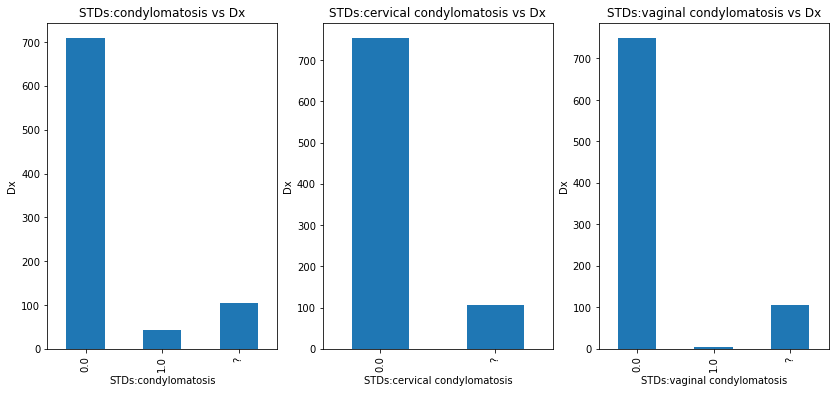

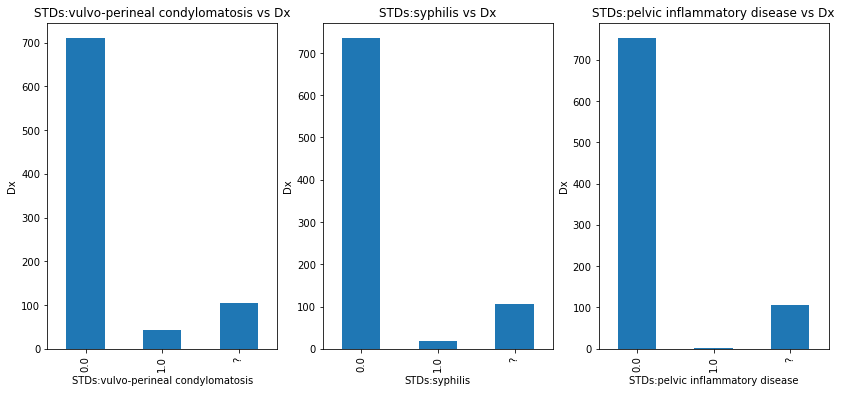

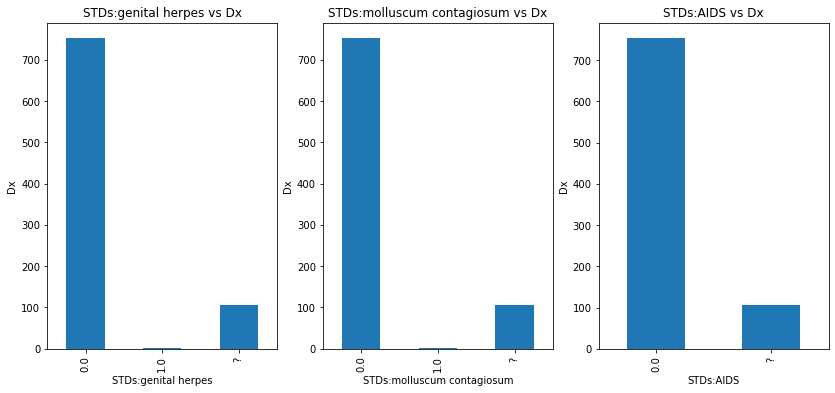

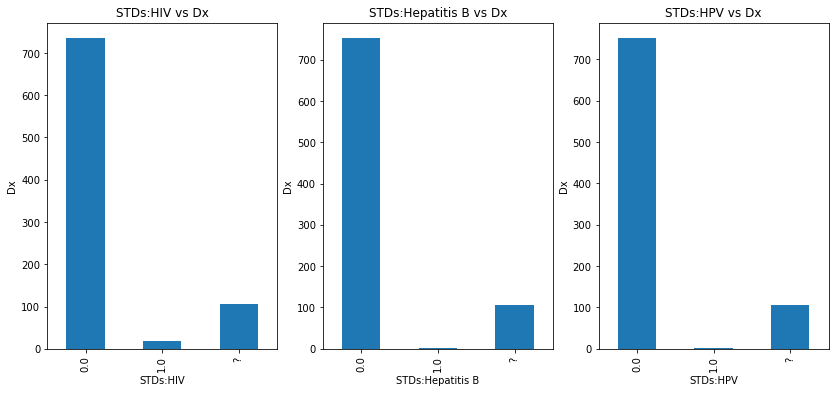

In [26]:
### Your code here
i = 0
c_per_g = 3
while i < len(cat_cols):
    fig, axes = plt.subplots(ncols=c_per_g,figsize=(14,6))
    ax1 = data.groupby(cat_cols[i]).count()["Dx"].plot(kind="bar", ax=axes[0])
    ax2 = data.groupby(cat_cols[i+1]).count()["Dx"].plot(kind="bar", ax=axes[1])
    ax3 = data.groupby(cat_cols[i+2]).count()["Dx"].plot(kind="bar", ax=axes[2])

    ax1.set_xlabel(cat_cols[i])
    ax1.set_ylabel("Dx")
    ax1.set_title(cat_cols[i] + " vs Dx")
    
    ax2.set_xlabel(cat_cols[i+1])
    ax2.set_ylabel("Dx")
    ax2.set_title(cat_cols[i+1] + " vs Dx")
    
    ax3.set_xlabel(cat_cols[i+2])
    ax3.set_ylabel("Dx")
    ax3.set_title(cat_cols[i+2] + " vs Dx")
    
    i += 3